In [5]:
import sys

sys.stdin = open(r"C:\Users\nguye\Documents\Code\Programming\C++\test.inp", "r")
sys.stdout = open(r"C:\Users\nguye\Documents\Code\Programming\C++\test.out", "w")
input = sys.stdin.readline
t = int(input())
for _ in range(t):
    n = int(input())
    if n <= 6:
        print("NO")
    elif n == 9:
        print("NO")
    elif n % 3 == 0:
        print("YES")
        print(1, 4, n - 5)
    else:
        print("YES")
        print(1, 2, n - 3)

In [20]:
import sys

sys.stdin = open(r"C:\Users\nguye\Documents\Code\Programming\C++\test.inp", "r")
sys.stdout = open(r"C:\Users\nguye\Documents\Code\Programming\C++\test.out", "w")
input = sys.stdin.readline


def dist(a1, a2, b1, b2):
    return (a1 - b1) ** 2 + (a2 - b2) ** 2


t = int(input())
for _ in range(t):
    p_x, p_y = map(int, input().split())
    a_x, a_y = map(int, input().split())
    b_x, b_y = map(int, input().split())
    x = min(
        max(dist(a_x, a_y, p_x, p_y), dist(a_x, a_y, 0, 0)),
        max(dist(p_x, p_y, b_x, b_y), dist(0, 0, b_x, b_y)),
        max(
            dist(a_x, a_y, p_x, p_y), dist(0, 0, b_x, b_y), dist(a_x, a_y, b_x, b_y) / 4
        ),
        max(
            dist(p_x, p_y, b_x, b_y), dist(0, 0, a_x, a_y), dist(a_x, a_y, b_x, b_y) / 4
        ),
    )
    print(x**0.5)

## [C. Decreasing String](https://codeforces.com/contest/1886/problem/C)

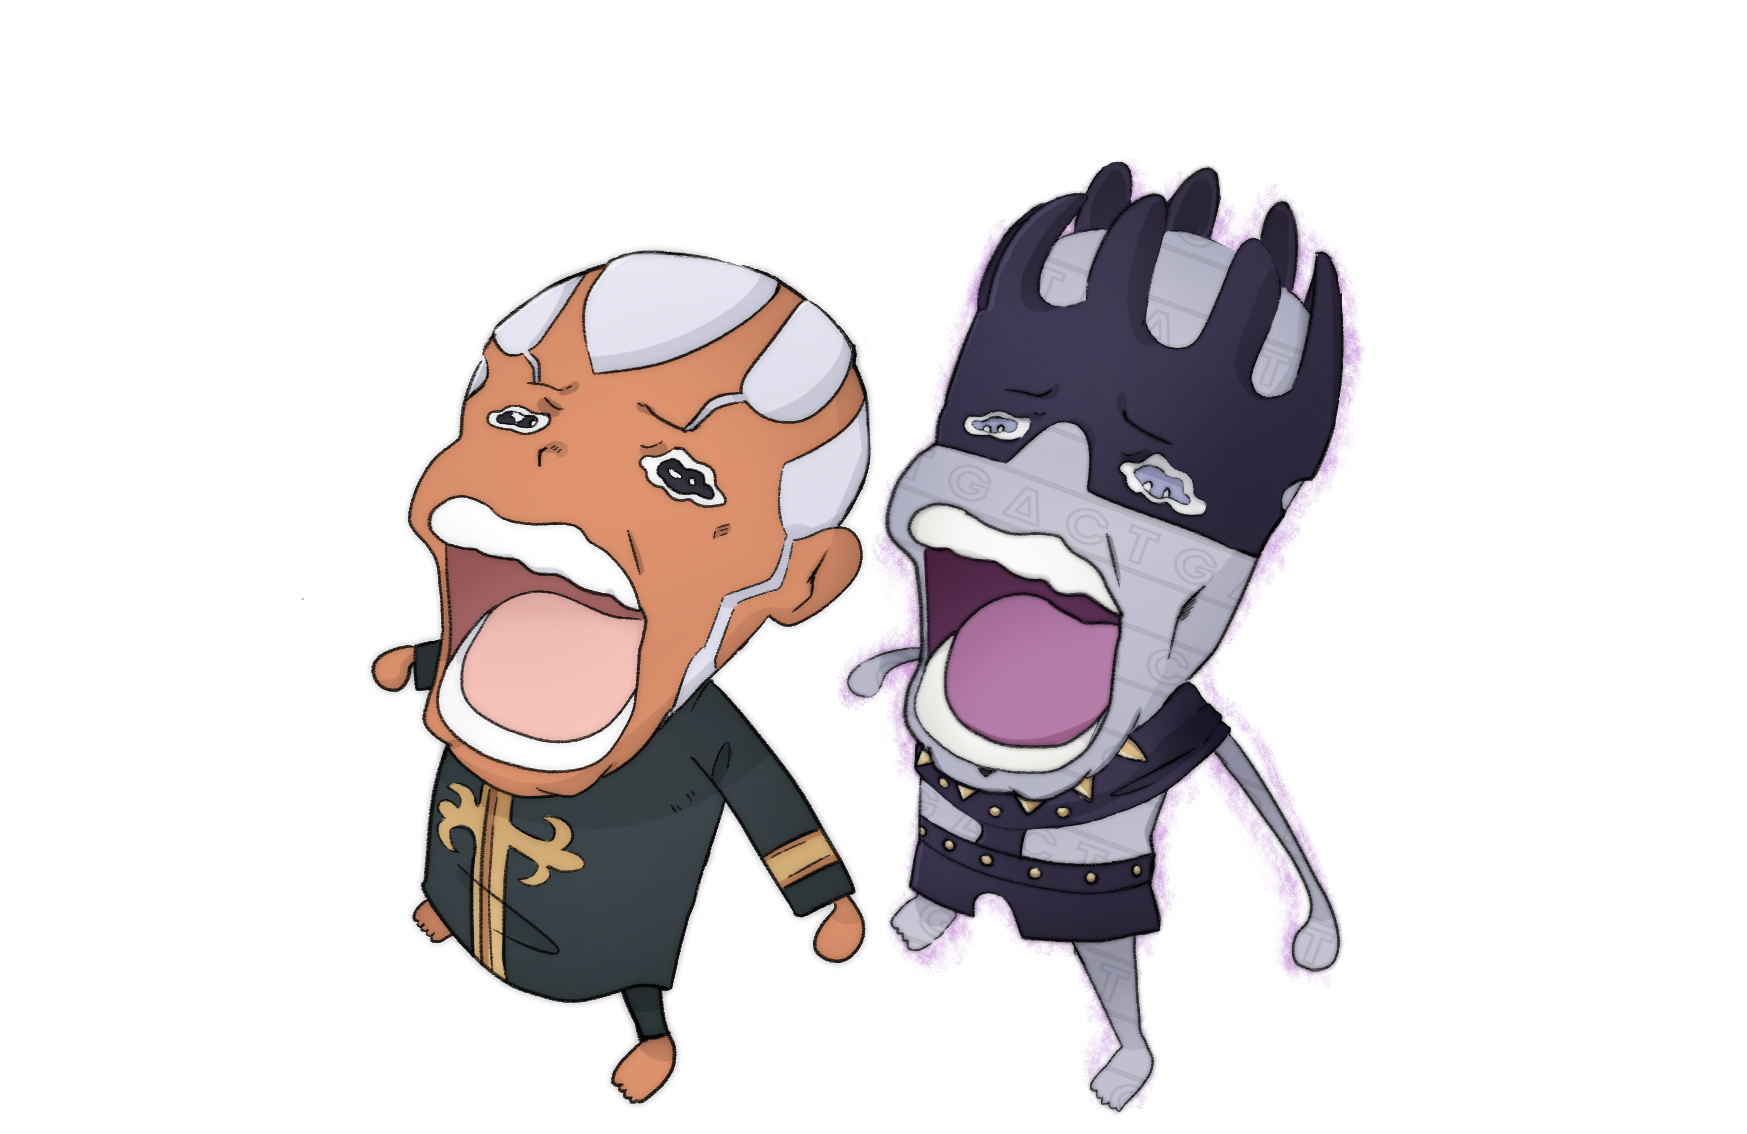

In [184]:
import sys

sys.stdin = open(r"C:\Users\nguye\Documents\Code\Programming\C++\test.inp", "r")
sys.stdout = open(r"C:\Users\nguye\Documents\Code\Programming\C++\test.out", "w")
input = sys.stdin.readline
t = int(input())
for _ in range(t):
    s = input().rstrip()
    pos = int(input())
    n = N = len(s)
    c = 0
    while pos > 0:
        pos -= N
        N -= 1
        c += 1
    stack = [s[0]]
    i = 1
    count = 0
    c -= 1
    while count < c:
        if i < n:
            while stack and stack[-1] > s[i] and count < c:
                stack.pop()
                count += 1
            stack.append(s[i])
            i += 1
        else:
            stack.pop()
            count += 1
    for char in s[i:]:
        stack.append(char)
    print(stack[pos - 1], end="")

In [12]:
from bisect import bisect_right
from typing import List


class Solution:
    def minOperations(self, nums: List[int]) -> int:
        nums.sort()
        n = len(nums) - 1
        if nums[0] == nums[-1]:
            return n
        ocr = {}
        for i in range(n + 1):
            if nums[i] != nums[i - 1]:
                ocr[nums[i]] = ocr.get(nums[i - 1], 0) + 1
        min_op = float("inf")
        for i in range(n - 1):
            if nums[i] == nums[i + 1]:
                continue
            pos = bisect_right(nums, nums[i] + n)
            min_op = min(min_op, n - ocr[nums[pos - 1]] + ocr[nums[i]])
        return min_op


nums = [2, 5, 10, 3, 5, 3]
# nums = [3, 2, 10, 100, 3, 2, 4, 3]
print(Solution().minOperations(nums))

[2, 3, 3, 5, 5, 10]
0 2 5 3
2 3 5 3
3


In [14]:
import numpy as np
import pyperclip
pyperclip.copy(str(list(np.random.randint(1, 1000000, 10000))))

In [5]:
# segment tree for updating range from l to r
class SegmentTree:
    def __init__(self, arr):
        """
        Initialize the SegmentTree object with an array of values.

        Args:
        - arr: list of int - the array of values to be used to build the segment tree
        """
        self.arr = arr
        self.n = len(arr)
        self.tree = [0] * (4 * self.n)

    def build(self, node, start, end):
        """
        Build the segment tree recursively.

        Args:
        - node: int - the index of the current node in the tree
        - start: int - the start index of the current segment
        - end: int - the end index of the current segment
        """
        if start == end:
            self.tree[node] = self.arr[start]
        else:
            mid = (start + end) // 2
            self.build(2 * node, start, mid)
            self.build(2 * node + 1, mid + 1, end)
            self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]

    def update(self, node, start, end, l, r, val):
        """
        Update the values in the segment tree for the given range.

        Args:
        - node: int - the index of the current node in the tree
        - start: int - the start index of the current segment
        - end: int - the end index of the current segment
        - l: int - the start index of the range to be updated
        - r: int - the end index of the range to be updated
        - val: int - the value to be added to the range
        """
        if start > end or start > r or end < l:
            return
        if start == end:
            self.tree[node] += val
        else:
            mid = (start + end) // 2
            self.update(2 * node, start, mid, l, r, val)
            self.update(2 * node + 1, mid + 1, end, l, r, val)
            self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]

    def query(self, node, start, end, l, r):
        """
        Query the sum of values in the segment tree for the given range.

        Args:
        - node: int - the index of the current node in the tree
        - start: int - the start index of the current segment
        - end: int - the end index of the current segment
        - l: int - the start index of the range to be queried
        - r: int - the end index of the range to be queried

        Returns:
        - int - the sum of values in the segment tree for the given range
        """
        if start > end or start > r or end < l:
            return 0
        if start >= l and end <= r:
            return self.tree[node]
        mid = (start + end) // 2
        p1 = self.query(2 * node, start, mid, l, r)
        p2 = self.query(2 * node + 1, mid + 1, end, l, r)
        return p1 + p2


arr = [0] * 10
st = SegmentTree(arr)
st.update(1, 0, st.n - 1, 0, 9, 6)
st.query(1, 0, st.n - 1, 0, 7)

48

In [34]:
from typing import List
from bisect import bisect_left, bisect_right


# segment tree for updating range from l to r
class SegmentTree:
    def __init__(self, arr):
        """
        Initialize the SegmentTree object with an array of values.

        Args:
        - arr: list of int - the array of values to be used to build the segment tree
        """
        self.arr = arr
        self.n = len(arr)
        self.tree = [0] * (4 * self.n)
        self.lazy = [0] * (4 * self.n)

    def build(self, node, start, end):
        """
        Build the segment tree recursively.

        Args:
        - node: int - the index of the current node in the tree
        - start: int - the start index of the current segment
        - end: int - the end index of the current segment
        """
        if start == end:
            self.tree[node] = self.arr[start]
        else:
            mid = (start + end) // 2
            self.build(2 * node, start, mid)
            self.build(2 * node + 1, mid + 1, end)
            self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]

    def update(self, node, start, end, l, r, val):
        """
        Update the values in the segment tree for the given range.

        Args:
        - node: int - the index of the current node in the tree
        - start: int - the start index of the current segment
        - end: int - the end index of the current segment
        - l: int - the start index of the range to be updated
        - r: int - the end index of the range to be updated
        - val: int - the value to be added to the range
        """
        if self.lazy[node] != 0:
            self.tree[node] += self.lazy[node]
            if start != end:
                self.lazy[2 * node] += self.lazy[node]
                self.lazy[2 * node + 1] += self.lazy[node]
            self.lazy[node] = 0

        if start > end or start > r or end < l:
            return
        if start >= l and end <= r:
            self.tree[node] += val
            if start != end:
                self.lazy[2 * node] += val
                self.lazy[2 * node + 1] += val
        else:
            mid = (start + end) // 2
            self.update(2 * node, start, mid, l, r, val)
            self.update(2 * node + 1, mid + 1, end, l, r, val)
            self.tree[node] = self.tree[2 * node] + self.tree[2 * node + 1]

    def query(self, node, start, end, l, r):
        """
        Query the sum of values in the segment tree for the given range.

        Args:
        - node: int - the index of the current node in the tree
        - start: int - the start index of the current segment
        - end: int - the end index of the current segment
        - l: int - the start index of the range to be queried
        - r: int - the end index of the range to be queried

        Returns:
        - int - the sum of values in the segment tree for the given range
        """
        if self.lazy[node] != 0:
            self.tree[node] += self.lazy[node]
            if start != end:
                self.lazy[2 * node] += self.lazy[node]
                self.lazy[2 * node + 1] += self.lazy[node]
            self.lazy[node] = 0

        if start > end or start > r or end < l:
            return 0
        if start >= l and end <= r:
            return self.tree[node]
        mid = (start + end) // 2
        p1 = self.query(2 * node, start, mid, l, r)
        p2 = self.query(2 * node + 1, mid + 1, end, l, r)
        return p1 + p2


class Solution:
    def fullBloomFlowers(self, flowers: List[List[int]], people: List[int]) -> List[int]:
        pp = sorted([(p, i) for i, p in enumerate(people)])
        people = [p[0] for p in pp]
        n = len(people)
        sg = SegmentTree([0] * n)
        for f, s in flowers:
            l, r = bisect_left(people, f), bisect_right(people, s)
            sg.update(1, 0, n - 1, l, r - 1, 1)
        for idx, p in enumerate(pp):
            people[p[1]] = sg.query(1, 0, n - 1, idx, idx)
        return people


In [31]:
import numpy as np
import pyperclip
pyperclip.copy(str(list(np.random.randint(1, 1000, 50000))))

In [32]:
import numpy as np
import pyperclip
a = np.random.randint(1, 1000, (5000, 2))
a = np.sort(a, axis=1)
pyperclip.copy(str(list(map(list, a))))


In [26]:
x = [1,2,2,2,3,3,3]
bisect_left(x,2)

1

In [ ]:
# core of segment tree to implement all other functions
class CoreSegmentTree:
    def __init__(self, arr):
        """
        Initialize the CoreSegmentTree object with an array of values.

        Args:
        - arr: list of int - the array of values to be used to build the segment tree
        """
        self.arr = arr
        self.n = len(arr)
        self.tree = [0] * (4 * self.n)
        self.lazy = [0] * (4 * self.n)
        self.op = ['max', 'min', 'sum', 'gcd', 'lcm', 'xor', 'or', 'and']

    def build(self, node, start, end):
        """
        Build the segment tree recursively.

        Args:
        - node: int - the index of the current node in the tree
        - start: int - the start index of the current segment
        - end: int - the end index of the current segment
        """
        if start == end:
            self.tree[node] = self.arr[start]
        else:
            mid = (start + end) // 2
            self.build(2 * node, start, mid)
            self.build(2 * node + 1, mid + 1, end)
            if self.op == 'max':
                self.tree[node] = max(self.tree[2 * node], self.tree[2 * node + 1])
            elif self.op == 'min':
                self.tree[node] = min(self.tree[2 * node], self.tree[2 * node + 1])

In [ ]:
class Solution:
    def findInMountainArray(self, target: int, mountain_arr: 'MountainArray') -> int:
        # Save the length of the mountain array
        length = mountain_arr.length()

        # 1. Find the index of the peak element
        low = 1
        high = length - 2
        while low != high:
            test_index = (low + high) // 2
            if mountain_arr.get(test_index) < mountain_arr.get(test_index + 1):
                low = test_index + 1
            else:
                high = test_index
        peak_index = low

        # 2. Search in the strictly increasing part of the array
        low = 0
        high = peak_index
        while low != high:
            test_index = (low + high) // 2
            if mountain_arr.get(test_index) < target:
                low = test_index + 1
            else:
                high = test_index    
        # Check if the target is present in the strictly increasing part
        if mountain_arr.get(low) == target:
            return low
        
        # 3. Otherwise, search in the strictly decreasing part
        low = peak_index + 1
        high = length - 1
        while low != high:
            test_index = (low + high) // 2
            if mountain_arr.get(test_index) > target:
                low = test_index + 1
            else:
                high = test_index
        # Check if the target is present in the strictly decreasing part
        if mountain_arr.get(low) == target:
            return low
        
        # Target is not present in the mountain array
        return -1